<a href="https://colab.research.google.com/github/Pali29/Heart_Disease_ML_model/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Handling**

## **Imports**

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
#imported all necessary libraries and main data set in variable data frame as df.

df = pd.read_csv("https://raw.githubusercontent.com/Pali29/ML-datasets/main/heart.csv")

## **Data Cleaning**

### **Missing Values and Duplicates**

In [ ]:
#sorted and unvalid values marked
new_df = df.sort_values(by='Age')
new_df = new_df.replace({'RestingBP':0,'Cholesterol':0},np.NaN)

<Axes: ylabel='Cholesterol'>

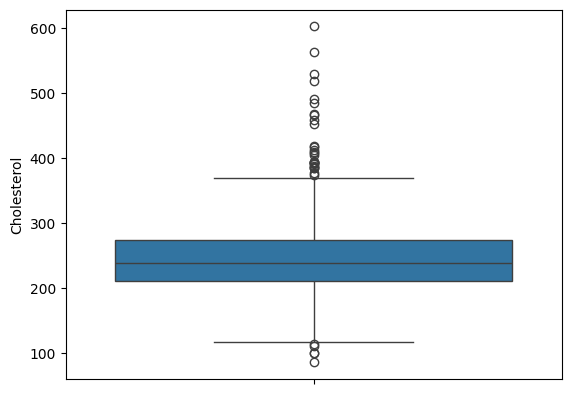

In [ ]:
#interpolation for eliminating null values and then scrap error values using box plot.
new_df = new_df.interpolate(method="linear")
new_df = new_df.drop_duplicates()
sns.boxplot(new_df['Cholesterol'])


### **Outliers**

<Axes: ylabel='RestingBP'>

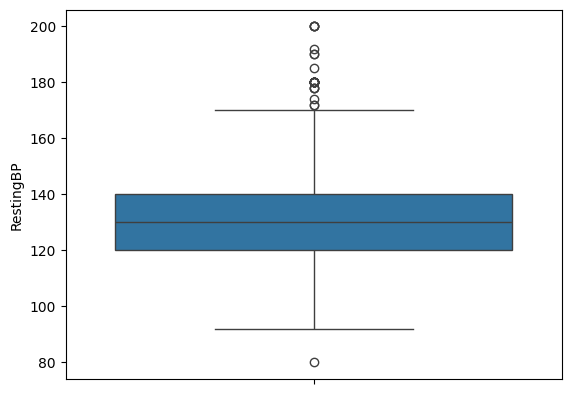

In [ ]:
processed_df = new_df[new_df['Cholesterol']<=400]
processed_df = processed_df[processed_df['Cholesterol']>=110]
sns.boxplot(new_df['RestingBP'])

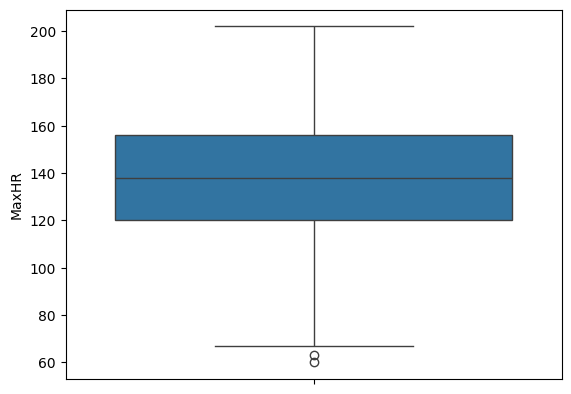

In [ ]:
processed_df = processed_df[processed_df['RestingBP']<=170]
processed_df = processed_df[processed_df['RestingBP']>=90]
sns.boxplot(processed_df['MaxHR'])
processed_df = processed_df[processed_df['MaxHR']>=70]
#all excess scrap values removed that were impractical or out of line. eg: BP of a human dropping below 100.

# **Model Design**

## **Dividing**

In [ ]:
#partition into input and output variables for graphical uses.
#also convert all string values to numerical values using one_hot_encoding.
Y = processed_df["HeartDisease"]
X = processed_df.drop("HeartDisease", axis=1)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalfeatures = ["ChestPainType", "Sex", "RestingECG", "ExerciseAngina", "ST_Slope",]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_Hot",one_hot,categoricalfeatures)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)

## **Splitting Into Test and Training**

In [ ]:
#model data splitting. ratio 80:20 random state selected using random number generator.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2, random_state=65)

## **Linear Regression**

In [ ]:
#implement linear regression model for ML.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

## **Random Forest**

In [ ]:
#implement random forest model for ML.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
Y_rf_train_pred = rf.predict(X_train)
Y_rf_test_pred = rf.predict(X_test)

# **Evaluate Performance**

In [ ]:
#evaluating performance of both models on given training and testing sets.
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

In [ ]:
#using mean square error and R square methods for deviation of regular data to find irregularities in model results.
rf_train_mse = mean_squared_error(Y_train, Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)

rf_test_mse = mean_squared_error(Y_test, Y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, Y_rf_test_pred)

# **Results**

In [ ]:
#implementing final results into a dataframe.
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
lr_results.columns = ["Method", "MSE_Training", "R2_Training", "MSE_Test", "R2_Test"]
rf_results.columns = ["Method", "MSE_Training", "R2_Training", "MSE_Test", "R2_Test"]

result = pd.concat([lr_results, rf_results], axis=0)
result.reset_index()
result

,Method,MSE_Training,R2_Training,MSE_Test,R2_Test
0,Linear Regression,0.105447,0.571673,0.107143,0.571427
0,Random Forest,0.133621,0.45723,0.16092,0.356322


In [ ]:
from sklearn import metrics
Y_pred = rf.predict(X_test)
print("Accuracy for Random Forest:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy for Random Forest: 0.8390804597701149
